**Notas para contenedor de docker:**

Comando de docker para ejecución de la nota de forma local:

nota: cambiar `<ruta a mi directorio>` por la ruta de directorio que se desea mapear a `/datos` dentro del contenedor de docker.

```
docker run --rm -v <ruta a mi directorio>:/datos --name jupyterlab_numerical -p 8888:8888 -d palmoreck/jupyterlab_numerical:1.1.0
```

password para jupyterlab: `qwerty`

Detener el contenedor de docker:

```
docker stop jupyterlab_numerical
```


Documentación de la imagen de docker `palmoreck/jupyterlab_numerical:1.1.0` en [liga](https://github.com/palmoreck/dockerfiles/tree/master/jupyterlab/numerical).

---

Nota basada en [liga1](https://drive.google.com/file/d/1xtkxPCx05Xg4Dj7JZoQ-LusBDrtYUqOF/view?usp=sharing), [liga2](https://drive.google.com/file/d/16-_PvWNaO0Zc9x04-SRsxCRdn5fxebf2/view?usp=sharing)

# Problemas de optimización sin restricciones

En esta nota se consideran resolver problemas de la forma:

$$\min f_o(x)$$

con $f:\mathbb{R}^n \rightarrow \mathbb{R}$ fuertemente convexa y $f \in \mathcal{C}^2(\text{dom}f)$ para buscar óptimos locales. Además se asume que los puntos iniciales $x^{(0)}$ de los métodos iterativos están en $\text{dom}f$ y los conjuntos $f(x^{(0)})$-subnivel son conjuntos cerrados. Ver [1.4.Polinomios_de_Taylor_y_diferenciacion_numerica](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/blob/master/temas/I.computo_cientifico/1.4.Polinomios_de_Taylor_y_diferenciacion_numerica.ipynb) y [4.1.Optimizacion_numerica_y_machine_learning](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/blob/master/temas/IV.optimizacion_convexa_y_machine_learning/4.1.Optimizacion_numerica_y_machine_learning.ipynb) para definiciones utilizadas en esta nota.

También se asume que existe un punto óptimo $x^*$ por lo que el problema tiene solución y el valor óptimo se denota por $p^* = f(x^*) = \inf f(x)$

Las suposición que una función $f$ sea convexa asegura que una **condición necesaria y suficiente** para que $x^*$ sea óptimo es: $\nabla f(x^*) = 0$ la cual es **en general** es un conjunto de $n$ **ecuaciones no lineales** en $n$ variables y que resuelve el problema de optimización planteado al inicio. 


**Ejemplos:**

1)$$\displaystyle \min_{x \in \mathbb{R}^2} x_1^4+2x_1^2x_2+x_2^2$$

Entonces:

$$
\nabla f(x) = 
\left [
\begin{array}{c}
4x_1^3+4x_1x_2\\
2x_1^2+2x_2
\end{array}
\right ]=0
$$

que es una ecuación de dos variables y dos incógnitas **no lineal**.

2) $$\displaystyle \min_{x \in \mathbb{R}^2} \frac{1}{2}x^TPx+q^Tx+r$$

con $P=\left [\begin{array}{cc}
5 & 4\\
4 & 5
\end{array}
\right ]$, $q=\left [\begin{array}{c}
-1\\
1
\end{array}
\right]
$, $r=3$. Obsérvese que haciendo las multiplicaciones de matriz-vector y productos punto se reescribe el problema como:



$$\displaystyle \min_{x \in \mathbb{R}^2} \frac{5}{2}x_1^2 + \frac{5}{2}x_2^2+4x_1x_2 -x_1 + x_2+3$$ 

Entonces:

$$\nabla f(x) = Px +q =\left [ \begin{array}{cc}
5 & 4\\
4 & 5
\end{array}
\right ]
\left [ \begin{array}{c}
x_1\\
x_2
\end{array}
\right ]
+ \left [ \begin{array}{c}
-1\\
1
\end{array}
\right ]=
\left [ \begin{array}{cc}
5x_1+4x_2-1\\
4x_1+5x_2+1
\end{array}
\right ]
=0
$$

que es una ecuación en dos variables con dos incógnitas **lineal**.

**Comentario:** en algunos casos especiales es posible resolver la ecuación no lineal $\nabla f(x) = 0$ para $x$ de forma analítica o cerrada. Este es el caso del ejemplo $2$ anterior la cual está dada por $x^* = -P^{-1}q$:

In [1]:
import numpy as np

In [2]:
P=np.array([[5,4],[4,5]])
q=np.array([-1,1])
np.linalg.solve(P,-q)

array([ 1., -1.])

pero típicamente se utiliza un método iterativo: calcular una secuencia de puntos $x^{(0)}, x^{(1)}, \dots \in \text{dom}f$ con $f(x^{(k)}) \rightarrow p^*$ si $k \rightarrow \infty$. El conjunto de puntos $x^{(0)}, x^{(1)},\dots$ se nombra **secuencia de minimización** para el problema de optimización. El algoritmo termina si $f(x^{(k)})-p^* \leq \epsilon$ con $\epsilon >0$ una tolerancia dada. Tales métodos se conocen con el nombre de **métodos de descenso**.

## Métodos de descenso

La secuencia de minimización se obtiene con la fórmula: $x^{(k+1)} = x^{(k)} + t^{(k)}\Delta x^{(k)}$. Al vector $\Delta x \in \mathbb{R}^n$ se le nombra **paso o dirección de búsqueda**. Al escalar $t^{(k)}$ se le nombra **tamaño o longitud de paso** y siempre es positivo salvo en el caso en que $x^{(k)}$ sea óptimo.

Se les nombra métodos de descenso pues para la secuencia de minimización se cumple la desigualdad: $f(x^{(k+1)}) < f(x^{(k)})$, excepto para $x^{(k)}$ óptimo.

La suposición que el conjunto $f(x^{(0)})$-subnivel sea cerrado garantiza que la secuencia de minimización está en el conjunto $f(x^{(0)})$-subnivel para todas las iteraciones.

**Condición para que un paso o dirección de búsqueda sea de descenso**

Si el paso o dirección de búsqueda satisface la condición: $\nabla f^T(x^{(k)})\Delta x^{(k)} < 0$ se le nombra **dirección de descenso**. Geométricamente las direcciones de descenso forman un **ángulo agudo** con $-\nabla f(x^{(k)})$:



<img src="https://dl.dropboxusercontent.com/s/o3hypqiociye9jv/zone-for-descent-directions.png?dl=0" heigth="350" width="350">

>**Algoritmo** de descenso
>> **Dado** un **punto inicial** $x$ en $\text{dom}f$

>> **Repetir** el siguiente bloque para $k=0,1,2,...$

>>> 1. Determinar una dirección de descenso $\Delta x$.
>>> 2. Búsqueda de línea. Elegir un tamaño de paso $t > 0$.
>>> 3. Hacer la actualización: $x = x + t\Delta x$.

>> **hasta** convergencia (satisfacer criterio de paro).


**Nota:** los pasos en el algoritmo anterior representan una guía para la implementación. Al describirse los pasos de un algoritmo no implica que se tengan que implementar uno a continuación del otro como se describe. Si una implementación respeta la lógica y al mismo método, entonces pueden seguirse los pasos de una forma distinta.

**Comentarios:**

* El criterio de paro típicamente es de la forma $||\nabla f(x)|| \leq \text{TOL}$ donde: $\text{TOL}$ es una cantidad pequeña y positiva (menor o igual a $10^{-8}$). También se involucra el número máximo de iteraciones en el criterio de paro.

* El paso $2$ busca reducir $f$ lo **suficiente** o minimizarla aproximadamente a lo largo de un **rayo**\*. Uno de los métodos que permite de forma sencilla lo anterior es la **búsqueda de línea por *backtracking***.

\* Un rayo es el conjunto definido por $\{x + \theta v : \theta \geq 0 , v \neq 0, v \in \mathbb{R}^n\}$ para $x \in \mathbb{R}^n$.

## Método de búsqueda de línea por *backtracking*

Para entender el método de búsqueda de línea por *backtracking* supóngase que $f$ tiene una forma siguiente:

<img src="https://dl.dropboxusercontent.com/s/0woqoj8foo5eco9/level_set_of_func.png?dl=0" heigth="300" width="300">


Y considérese una función $g: \mathbb{R} \rightarrow \mathbb{R}$ igual a $f$ pero restringida al rayo $x + t\Delta x$, esto es: $g(t) = f(x+t \Delta x)$ con $t>0$, $\Delta x$ dirección de descenso. Lo anterior se visualiza como sigue:

<img src="https://dl.dropboxusercontent.com/s/18udjmzmmd7drrz/line_search_backtracking_1.png?dl=0" heigth="300" width="300">

Y como $f$ es continua y diferenciable, $g$ también lo es y $g(0)=f(x)$, $g'(t) = \nabla f(x+t\Delta x)^T \Delta x$. Si graficamos $g$ se tendría:

<img src="https://dl.dropboxusercontent.com/s/sgj7eqr2qysi8hs/line_search_backtracking_2.png?dl=0" heigth="300" width="300">


En la búsqueda de línea se construyen dos rectas. Una recta es $g(0) + \alpha g'(0)(t-0)$ con $\alpha \in (0,\frac{1}{2})$. La otra recta es $g(0)+g'(0)(t-0)$. Ambas rectas tienen pendiente negativa. Esto se visualiza como sigue:

<img src="https://dl.dropboxusercontent.com/s/11y008lq0fd6jl6/line_search_backtracking_3.png?dl=0" heigth="500" width="500">


En la búsqueda de línea por backtracking se busca $t_k$ tal que $f$ decrezca suficientemente. Lo anterior se establece con la desigualdad $f(x+t \Delta x) < f(x) + \alpha t \nabla f(x)^T \Delta x$:

<img src="https://dl.dropboxusercontent.com/s/o4f341x1y5sqxt8/line_search_backtracking_4.png?dl=0" heigth="500" width="500">


obsérvese en el dibujo anterior que la región en la que se elegirá $t_k$ está a la izquierda de la línea punteada vertical de color verde.

Y visualmente en $R^3$ se tiene:

<img src="https://dl.dropboxusercontent.com/s/t3yn7kkpd4il8hx/line_search_backtracking_5.png?dl=0" heigth="300" width="300">



El método depende de dos constantes $\alpha$ y $\beta$ con $\alpha \in (0,\frac{1}{2})$ y $\beta \in (0,1)$. 

>**Algoritmo** de búsqueda de línea por *backtracking*
>> **Dados** $\Delta x$ dirección de descenso para $f$ en $x \in \text{dom}f$, $\alpha \in (0,\frac{1}{2})$, $\beta \in (0,1)$.

>> **Asignar** t=1.

>> **Mientras** $f(x+t\Delta x) > f(x) + \alpha t \nabla f(x) ^T\Delta x$.

>>> 1. **Reducir** $t: t= \beta t$.


**Comentario:** El valor $\alpha$ típicamente se elige entre $.01$ y $.03$ que indica que se acepta un decrecimiento en el valor de $f$ entre el $1 \%$ y el $30 \%$. La constante $\beta$ comúnmente se elige entre $.1$ (que modifica fuertemente $t$) y $.8$ (que realiza una modificación menos drástica de $t$).

## Método de descenso en gradiente

In [3]:
import math
import matplotlib.pyplot as plt

### Funciones auxiliares

In [4]:
def inc_index(vec,index,h):
    '''
    Auxiliary function for gradient and Hessian computation.
    Args:
        vec (array): numpy array.
        index (int): index.
        h (float):   quantity that vec[index] will be increased.
    Returns:
        vec (array): numpy array vec with vec[index] increased by h.
    '''
    vec[index] +=h
    return vec

In [5]:
def dec_index(vec,index,h=1):
    '''
    Auxiliary function for gradient and Hessian computation.
    Args:
        vec (array): numpy array.
        index (int): index.
        h (float):   quantity that vec[index] will be decreased.
    Returns:
        vec (array): numpy array vec with vec[index] decreased by h.
    '''
    vec[index] -=h
    return vec

In [6]:
def gradient_approximation(f,x,h=1e-8):
    '''
    Numerical approximation of gradient for function f using forward differences.
    Args:
        f (lambda expression): definition of function f.
        x (array): numpy array that holds values where gradient will be computed.
        h (float): step size for forward differences, tipically h=1e-8
    Returns:
        gf (array): numerical approximation to gradient of f.
    '''
    n = x.size
    gf = np.zeros(n)
    f_x = f(x)
    for i in np.arange(n):
        inc_index(x,i,h)
        gf[i] = f(x) - f_x
        dec_index(x,i,h)
    return gf/h

In [7]:
def Hessian_approximation(f,x,h=1e-6):
    '''
    Numerical approximation of Hessian for function f using forward differences.
    Args:
        f (lambda expression): definition of function f.
        x (array): numpy array that holds values where Hessian will be computed.
        h (float): step size for forward differences, tipically h=1e-6
    Returns:
        Hf (array): numerical approximation to Hessian of f.
    '''
    n = x.size
    Hf = np.zeros((n,n))
    f_x = f(x)
    for i in np.arange(n):
        inc_index(x,i,h)
        f_x_inc_in_i = f(x)
        for j in np.arange(i,n):
            inc_index(x,j,h)
            f_x_inc_in_i_j = f(x)
            dec_index(x,i,h)
            f_x_inc_in_j = f(x)
            dif = f_x_inc_in_i_j-f_x_inc_in_i-f_x_inc_in_j+f_x
            Hf[i,j] = dif
            if j != i:
                Hf[j,i] = dif
            dec_index(x,j,h)
            inc_index(x,i,h)
        dec_index(x,i,h)
    return Hf/h**2

In [8]:
def line_search_by_backtracking(f,dir_desc,x,
                                der_direct, alpha=.15, beta=.5):
    """
    Line search that sufficiently decreases f restricted to a ray in the direction dir_desc.
    Args:
        alpha (float): parameter in line search with backtracking, tipically .15
        beta (float): parameter in line search with backtracking, tipically .5
        f (lambda expression): definition of function f.
        dir_desc (array): descent direction.
        x (array): numpy array that holds values where line search will be performed.
        der_direct (float): directional derivative of f.
    Returns:
        t (float): positive number for stepsize along dir_desc that sufficiently decreases f.
    """
    t=1
    if alpha > 1/2:
        print('alpha must be less than or equal to 1/2')
        t=-1
    if beta>1:
        print('beta must be less than 1')
        t=-1;   
    if t!=-1:
        eval1 = f(x+t*dir_desc)
        eval2 = f(x) + alpha*t*der_direct
        while eval1 > eval2:
            t=beta*t
            eval1=f(x+t*dir_desc)
            eval2=f(x)+alpha*t*der_direct
    else:
        t=-1
    return t

### Descenso en gradiente

In [9]:
def compute_error(x_obj,x_approx):
    '''
    Relative error between x_obj and x_approx.
    '''
    if np.linalg.norm(x_ast) > np.nextafter(0,1):
        Err=np.linalg.norm(x_obj-x_approx)/np.linalg.norm(x_obj)
    else:
        Err=np.linalg.norm(x_obj-x_approx)
    return Err

In [10]:
def gradient_descent(f, x_0, tol, 
                     tol_backtracking, x_ast=None, p_ast=None, maxiter=30):
    '''
    Method of gradient descent to numerically approximate solution of min f.
    Args:
        f (lambda expression): definition of function f.
        x_0 (array): initial point for gradient descent method.
        tol (float): tolerance that will halt method. Controls norm of gradient of f.
        tol_backtracking (float): tolerance that will halt method. Controls value of line search by backtracking.
        x_ast (array): solution of min f, now it's required that user knows the solution...
        p_ast (float): value of f(x_ast), now it's required that user knows the solution...
        maxiter (int): maximum number of iterations
    Returns:
        x (array): numpy array, approximation of x_ast.
        iteration (int): number of iterations.
        Err_plot (array): numpy array of absolute error between p_ast and f(x) with x approximation.
                          of x_ast. Useful for plotting.
        x_plot (array): numpy array that containts in columns vector of approximations. Last column
                        contains x, approximation of solution. Useful for plotting.
    '''
    iteration = 0
    x = x_0
    
    feval = f(x)
    gfeval = gradient_approximation(f,x)

    normgf = np.linalg.norm(gfeval)
    
    Err_plot_aux = np.zeros(maxiter)
    Err_plot_aux[iteration]=math.fabs(feval-p_ast)
    
    Err = compute_error(x_ast,x)
    n = x.size
    x_plot = np.zeros((n,maxiter))
    x_plot[:,iteration] = x
    
    print('I    Normagf   Error x_ast   Error p_ast   line search')
    print('{}    {:0.2e}    {:0.2e}    {:0.2e}     {}'.format(iteration,normgf,Err,Err_plot_aux[iteration],"---"))
    iteration+=1
    while(normgf>tol and iteration < maxiter):
        dir_desc = -gfeval
        der_direct = gfeval.dot(dir_desc)
        t = line_search_by_backtracking(f,dir_desc,x,der_direct)
        x = x + t*dir_desc
        feval = f(x)
        gfeval = gradient_approximation(f,x)
        normgf = np.linalg.norm(gfeval)
        Err_plot_aux[iteration] = math.fabs(feval-p_ast);
        x_plot[:,iteration] = x
        Err = compute_error(x_ast,x)
        print('{}    {:0.2e}    {:0.2e}    {:0.2e}     {:0.2e}'.format(iteration,normgf,Err,
                                                                      Err_plot_aux[iteration],t))
        if t<tol_backtracking: #if t is less than tol_backtracking then we need to check the reason
            iter_salida=iteration
            iteration = maxiter
        iteration+=1
    print('{} {:0.2e}'.format("Error of x with respect to x_ast:",Err))
    print('{} {}'.format("Approximate solution:", x))
    cond = Err_plot_aux > np.finfo(float).eps*10**(-2)
    Err_plot = Err_plot_aux[cond]
    x_plot = x_plot[:,~np.all(x_plot == 0,axis=0)]
    if iteration == maxiter and t < tol_backtracking:
        print("Backtracking value less than tol_backtracking, check approximation")
        iteration=iter_salida
    return [x,iteration,Err_plot,x_plot]

## Ejemplos

1) $$\min \quad (x_1-2)^2+(2-x_2)^2+x_3^2+x_4^4$$

La solución del problema anterior es $x^* = (2,2,0,0)^T$. 

Método de descenso gradiente con $x_0=(5,5,1,0)^T$:

In [11]:
fo = lambda x: (x[0]-2)**2 + (2-x[1])**2 + x[2]**2 + x[3]**4
x_ast = np.array([2,2,0,0],dtype=float)
x_0 = np.array([5,5,1,0],dtype=float)
tol=1e-8
tol_backtracking=1e-14
maxiter=5
p_ast=fo(x_ast)
[x,total_of_iterations,Err_plot,x_plot]=gradient_descent(fo, x_0, tol, tol_backtracking, x_ast, p_ast, maxiter)

I    Normagf   Error x_ast   Error p_ast   line search
0    8.72e+00    1.54e+00    1.90e+01     ---
1    3.53e-07    6.10e-08    2.98e-14     5.00e-01
2    2.14e-15    3.06e-09    7.50e-17     5.00e-01
Error of x with respect to x_ast: 3.06e-09
Approximate solution: [ 2.e+00  2.e+00 -5.e-09  0.e+00]


In [12]:
x

array([ 2.e+00,  2.e+00, -5.e-09,  0.e+00])

In [13]:
total_of_iterations

3

In [14]:
Err_plot

array([1.90000000e+01, 2.97654832e-14, 7.49999861e-17])

In [15]:
x_plot

array([[ 5.00000000e+00,  2.00000011e+00,  2.00000000e+00],
       [ 5.00000000e+00,  2.00000011e+00,  2.00000000e+00],
       [ 1.00000000e+00, -8.27403711e-08, -5.00000000e-09],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

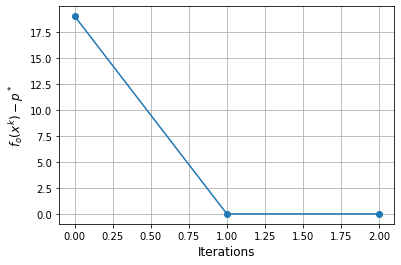

In [16]:
plt.plot(np.arange(Err_plot.size),Err_plot,'o-')
plt.ylabel('$f_o(x^k)-p^*$',size=12)
plt.xlabel('Iterations',size=12)
plt.grid()
plt.show()

**Comentario:** en esta gráfica se observa una convergencia **lineal** del método de descenso en gradiente para $f_o$.

### Ejemplo: influencia del número de condición 

2) El método de descenso en gradiente es **altamente sensible** a la forma de las curvas de nivel de la función objetivo $f_o$. Para observar esto considérese el problema: $$\min \frac{1}{2}\left(x_1^2+Cx_2^2 \right)$$

La solución del problema anterior es $x^*=(0,0)^T$.

Método de descenso en gradiente con $x_0=(0.5,0.5)^T$.

**Descenso en gradiente para caso $C=10$**

In [17]:
cte=10

In [18]:
fo = lambda x: 1/2*(x[0]**2+cte*x[1]**2)

In [19]:
x_ast=np.array([0,0],dtype=float)
x_0 = np.array([0.5,0.5],dtype=float)
tol=1e-8
tol_backtracking=1e-14
maxiter=50
p_ast=fo(x_ast)
[x,total_of_iterations,Err_plot,x_plot]=gradient_descent(fo, x_0, tol, tol_backtracking, x_ast, p_ast, maxiter)

I    Normagf   Error x_ast   Error p_ast   line search
0    5.02e+00    7.07e-01    1.38e+00     ---
1    1.32e+00    4.55e-01    1.74e-01     1.25e-01
2    4.94e-01    3.84e-01    7.82e-02     1.25e-01
3    5.50e-01    2.91e-01    5.22e-02     2.50e-01
4    2.77e-01    2.51e-01    3.22e-02     1.25e-01
5    4.85e-01    1.34e-01    1.89e-02     5.00e-01
6    1.61e-01    1.11e-01    6.73e-03     1.25e-01
7    1.94e-01    8.43e-02    4.94e-03     2.50e-01
8    8.45e-02    7.23e-02    2.70e-03     1.25e-01
9    8.53e-02    5.45e-02    1.68e-03     2.50e-01
10    1.07e-01    4.18e-02    1.31e-03     2.50e-01
11    4.33e-02    3.56e-02    6.61e-04     1.25e-01
12    4.56e-02    2.69e-02    4.23e-04     2.50e-01
13    2.51e-02    2.33e-02    2.76e-04     1.25e-01
14    3.89e-02    1.22e-02    1.37e-04     5.00e-01
15    1.38e-02    1.02e-02    5.62e-05     1.25e-01
16    1.59e-02    7.77e-03    3.89e-05     2.50e-01
17    7.54e-03    6.70e-03    2.30e-05     1.25e-01
18    1.43e-02    3.62e-

In [20]:
x

array([ 5.90613861e-07, -1.19699510e-07])

In [21]:
total_of_iterations

50

In [22]:
Err_plot.shape

(50,)

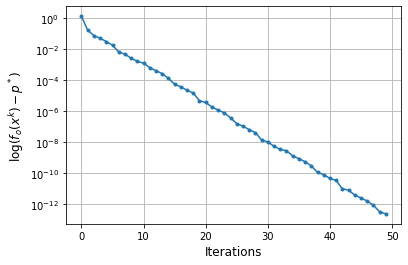

In [23]:
plt.yscale('log') #escala logarítmica en el eje vertical
plt.plot(np.arange(Err_plot.size),Err_plot,'.-')
plt.ylabel('$\log(f_o(x^k)-p^*)$',size=12)
plt.xlabel('Iterations',size=12)
plt.grid()
plt.show()

In [24]:
x_plot[:,0]

array([0.5, 0.5])

In [25]:
x_plot.shape

(2, 50)

In [26]:
x_plot[:,-1]

array([ 5.90613861e-07, -1.19699510e-07])

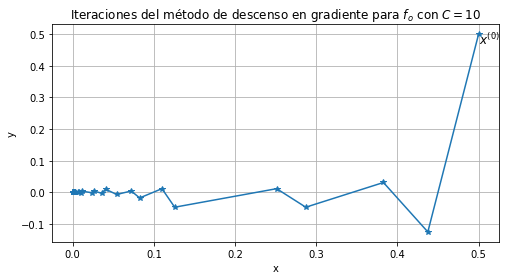

In [27]:
plt.figure(figsize=(8,4))
plt.plot(x_plot[0,:],x_plot[1,:],'-*')
plt.ylabel('y')
plt.xlabel('x')
plt.annotate('$x^{(0)}$',(x_plot[0,0],x_plot[1,0]),fontsize=12,xytext=(0.5, 0.47))
plt.title('Iteraciones del método de descenso en gradiente para $f_o$ con $C=10$')
plt.grid()
plt.show()

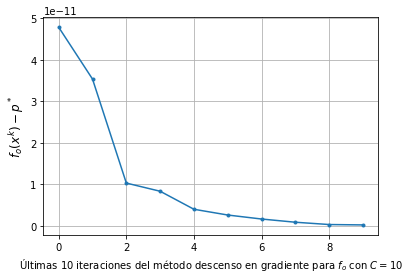

In [28]:
plt.plot(np.arange(Err_plot.size-40),Err_plot[40:],'.-')
plt.ylabel('$f_o(x^k)-p^*$',size=12)
plt.xlabel('Últimas 10 iteraciones del método descenso en gradiente para $f_o$ con $C=10$')
plt.grid()
plt.show()

**Comentario:** en esta gráfica se observa una convergencia **lineal** del método de descenso en gradiente para $f_o$.

**Curvas de nivel de $f_o$**

In [29]:
z=lambda x_mesh,y_mesh,cte: 1/2*(x_mesh**2+cte*y_mesh**2)

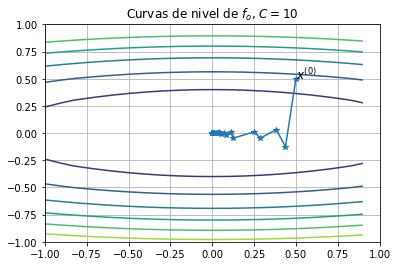

In [30]:
density=1e-1
xl=-1
yl=-1
xr=1
yr=1
x_p=np.arange(xl,xr,density)
y_p=np.arange(yl,yr,density)
x_mesh,y_mesh = np.meshgrid(x_p,y_p)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.contour(x_p,y_p,z(x_mesh,y_mesh,cte))
plt.plot(x_plot[0,:],x_plot[1,:],'-*')
plt.annotate('$x^{(0)}$',(x_plot[0,0],x_plot[1,0]),fontsize=12)
plt.grid()
plt.title("Curvas de nivel de $f_o$, $C=10$")
plt.show()

**Curvas de nivel $C=1$**

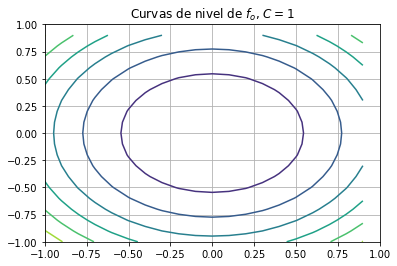

In [31]:
cte=1
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.contour(x_p,y_p,z(x_mesh,y_mesh,cte))
plt.grid()
plt.title("Curvas de nivel de $f_o$, $C=1$")
plt.show()

**Curvas de nivel $C=0.1$**

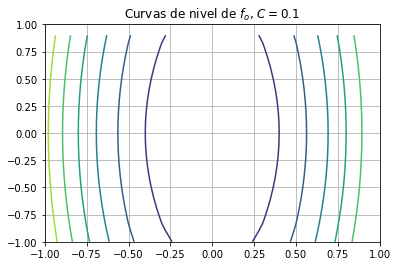

In [32]:
cte=.1
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.contour(x_p,y_p,z(x_mesh,y_mesh,cte))
plt.grid()
plt.title("Curvas de nivel de $f_o$, $C=0.1$")
plt.show()

Se puede probar que las curvas de nivel para $f_o$ bajo las suposiciones que están al inicio de esta nota tienen forma de elipsoides cerca del óptimo $x^*$ y son aproximadamente iguales al elipsoide definido como:

$$\mathcal{E}_{x^*} = \{z \in \mathbb{R}^2 : ||z-x^*||_{\nabla^2 f_o(x^*)}^2 \leq 1\}$$

\*La norma $||z||_P$ se nombra **norma cuadrática** y está definida para matrices simétricas positivas definidas $P$. La definición es: $$||z||_P = \sqrt{z^TPz}.$$

Obsérvese que $f_o(x)=\frac{1}{2}\left(x_1^2+Cx_2^2 \right)$ tiene una Hessiana igual a: $\nabla^2f(x)=\left [\begin{array}{cc}
1 & 0\\
0 & C\\
\end{array}
\right]
$ $\forall x \in \mathbb{R}^2$.

A continuación se presenta el elipsoide $\mathcal{E}_{x^{(k)}}=\{z \in \mathbb{R}^2 : ||z-x^{(k)}||_{\nabla^2 f_o(x^{(k)})}^2 \leq 1\}$ para la última iteración $x^{(k)}$ de los resultados del método de descenso en gradiente anteriores usando $C=10$:




In [33]:
cte=10

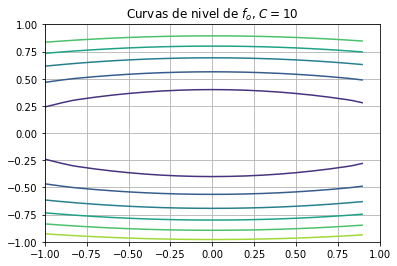

In [34]:
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.contour(x_p,y_p,z(x_mesh,y_mesh,cte))
plt.grid()
plt.title("Curvas de nivel de $f_o$, $C=10$")
plt.show()

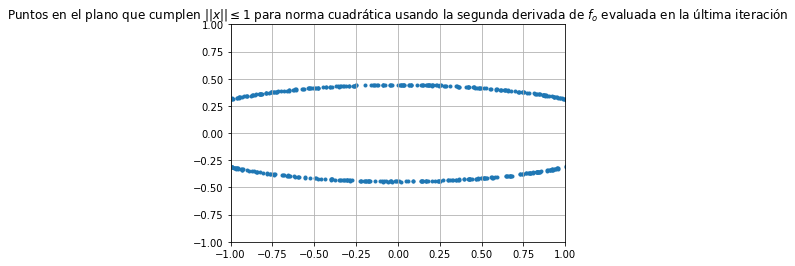

In [35]:
x_k = x_plot[:,-1].reshape(2,1)
Hf_x_k = Hessian_approximation(fo,x_k)
norm_cuad = lambda z : np.sum((z-x_k)*(Hf_x_k@(z-x_k)),axis=0)
density_p=int(2.5*10**5)
z_p=np.random.uniform(-2,2,(2,density_p))
lim_sup=2
lim_inf=1.95
ind=(norm_cuad(z_p)<=lim_sup) & (lim_inf<=norm_cuad(z_p))
z_p_subset = z_p[:,ind]
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.scatter(z_p_subset[0,:],z_p_subset[1,:],marker='.')
plt.title('Puntos en el plano que cumplen $||x|| \leq 1$ para norma cuadrática usando la segunda derivada de $f_o$ evaluada en la última iteración')
plt.grid()
plt.show()

**Número de condición de la matriz Hessiana**

In [36]:
Hf_x_k

array([[ 1.00000000e+00, -2.01948392e-16],
       [-2.01948392e-16,  1.00000000e+01]])

In [37]:
np.linalg.cond(Hf_x_k)

10.0

**La Hessiana es medianamente bien condicionada**

**Descenso en gradiente para caso $C=1$**

In [38]:
cte=1

In [39]:
x_ast=np.array([0,0],dtype=float)
x_0 = np.array([0.5,0.5],dtype=float)
tol=1e-8
tol_backtracking=1e-14
maxiter=50
p_ast=fo(x_ast)
[x,total_of_iterations,Err_plot,x_plot]=gradient_descent(fo, x_0, tol, tol_backtracking, x_ast, p_ast, maxiter)

I    Normagf   Error x_ast   Error p_ast   line search
0    7.07e-01    7.07e-01    2.50e-01     ---
1    4.33e-09    1.14e-08    6.50e-17     1.00e+00
Error of x with respect to x_ast: 1.14e-08
Approximate solution: [-8.06349476e-09 -8.06349476e-09]


In [40]:
x

array([-8.06349476e-09, -8.06349476e-09])

In [41]:
total_of_iterations

2

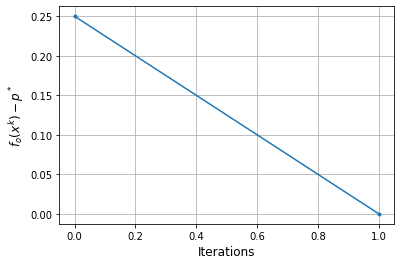

In [42]:
plt.plot(np.arange(Err_plot.size),Err_plot,'.-')
plt.ylabel('$f_o(x^k)-p^*$',size=12)
plt.xlabel('Iterations',size=12)
plt.grid()
plt.show()

**Comentario:** en esta gráfica se observa una convergencia **lineal** del método de descenso en gradiente para $f_o$ con $C=1$.

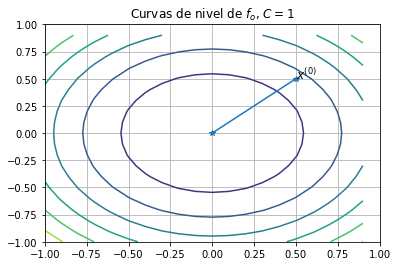

In [43]:
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.contour(x_p,y_p,z(x_mesh,y_mesh,cte))
plt.plot(x_plot[0,:],x_plot[1,:],'-*')
plt.annotate('$x^{(0)}$',(x_plot[0,0],x_plot[1,0]),fontsize=12)
plt.title("Curvas de nivel de $f_o$, $C=1$")
plt.grid()
plt.show()

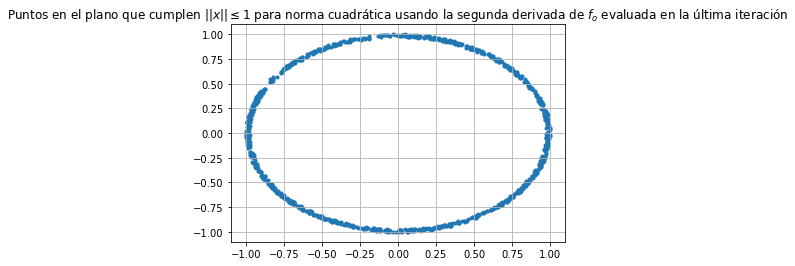

In [44]:
x_k = x_plot[:,-1].reshape(2,1)
Hf_x_k = Hessian_approximation(fo,x_k)
norm_cuad = lambda z : np.sum((z-x_k)*(Hf_x_k@(z-x_k)),axis=0)
density_p=int(2.5*10**4)
z_p=np.random.uniform(-1,1,(2,density_p))
lim_sup=1
lim_inf=.95
ind=(norm_cuad(z_p)<=lim_sup) & (lim_inf<=norm_cuad(z_p))
z_p_subset = z_p[:,ind]
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.scatter(z_p_subset[0,:],z_p_subset[1,:],marker='.')
plt.title('Puntos en el plano que cumplen $||x|| \leq 1$ para norma cuadrática usando la segunda derivada de $f_o$ evaluada en la última iteración')
plt.grid()
plt.show()

In [45]:
np.linalg.cond(Hf_x_k)

1.0

**La matriz Hessiana es bien condicionada**

**Descenso en gradiente para caso $C=0.1$**

In [46]:
cte=.1

In [47]:
x_ast=np.array([0,0],dtype=float)
x_0 = np.array([0.5,0.5],dtype=float)
tol=1e-8
tol_backtracking=1e-14
maxiter=70
p_ast=fo(x_ast)
[x,total_of_iterations,Err_plot,x_plot]=gradient_descent(fo, x_0, tol, tol_backtracking, x_ast, p_ast, maxiter)

I    Normagf   Error x_ast   Error p_ast   line search
0    5.02e-01    7.07e-01    1.38e-01     ---
1    4.50e-02    4.50e-01    1.01e-02     1.00e+00
2    4.05e-02    4.05e-01    8.20e-03     1.00e+00
3    3.65e-02    3.65e-01    6.64e-03     1.00e+00
4    3.28e-02    3.28e-01    5.38e-03     1.00e+00
5    2.95e-02    2.95e-01    4.36e-03     1.00e+00
6    2.66e-02    2.66e-01    3.53e-03     1.00e+00
7    2.39e-02    2.39e-01    2.86e-03     1.00e+00
8    2.15e-02    2.15e-01    2.32e-03     1.00e+00
9    1.94e-02    1.94e-01    1.88e-03     1.00e+00
10    1.74e-02    1.74e-01    1.52e-03     1.00e+00
11    1.57e-02    1.57e-01    1.23e-03     1.00e+00
12    1.41e-02    1.41e-01    9.97e-04     1.00e+00
13    1.27e-02    1.27e-01    8.08e-04     1.00e+00
14    1.14e-02    1.14e-01    6.54e-04     1.00e+00
15    1.03e-02    1.03e-01    5.30e-04     1.00e+00
16    9.27e-03    9.27e-02    4.29e-04     1.00e+00
17    8.34e-03    8.34e-02    3.48e-04     1.00e+00
18    7.50e-03    7.50e-

In [48]:
x

array([-4.99999993e-09,  3.48094310e-04])

In [49]:
total_of_iterations

70

In [50]:
Err_plot.shape

(70,)

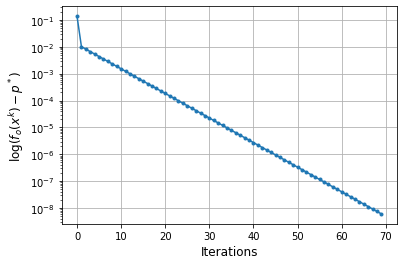

In [51]:
plt.yscale('log') #escala logarítmica en el eje vertical
plt.plot(np.arange(Err_plot.size),Err_plot,'.-')
plt.ylabel('$\log(f_o(x^k)-p^*)$',size=12)
plt.xlabel('Iterations',size=12)
plt.grid()
plt.show()

In [52]:
x_plot[:,-1]

array([-4.99999993e-09,  3.48094310e-04])

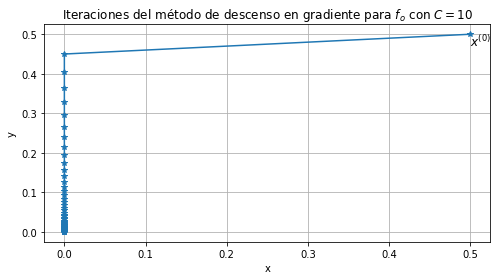

In [53]:
plt.figure(figsize=(8,4))
plt.plot(x_plot[0,:],x_plot[1,:],'-*')
plt.ylabel('y')
plt.xlabel('x')
plt.annotate('$x^{(0)}$',(x_plot[0,0],x_plot[1,0]),fontsize=12,xytext=(0.5, 0.47))
plt.title('Iteraciones del método de descenso en gradiente para $f_o$ con $C=10$')
plt.grid()
plt.show()

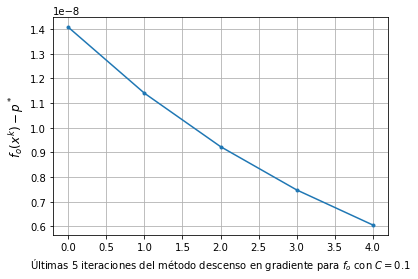

In [54]:
plt.plot(np.arange(Err_plot.size-65),Err_plot[65:],'.-')
plt.ylabel('$f_o(x^k)-p^*$',size=12)
plt.xlabel('Últimas 5 iteraciones del método descenso en gradiente para $f_o$ con $C=0.1$')
plt.grid()
plt.show()

**Comentario:** en esta gráfica se observa una convergencia **lineal** del método de descenso en gradiente para $f_o$.

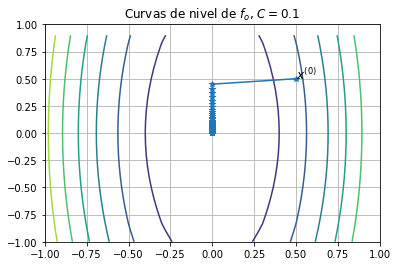

In [55]:
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.contour(x_p,y_p,z(x_mesh,y_mesh,cte))
plt.plot(x_plot[0,:],x_plot[1,:],'-*')
plt.annotate('$x^{(0)}$',(x_plot[0,0],x_plot[1,0]),fontsize=12)
plt.title("Curvas de nivel de $f_o$, $C=0.1$")
plt.grid()
plt.show()

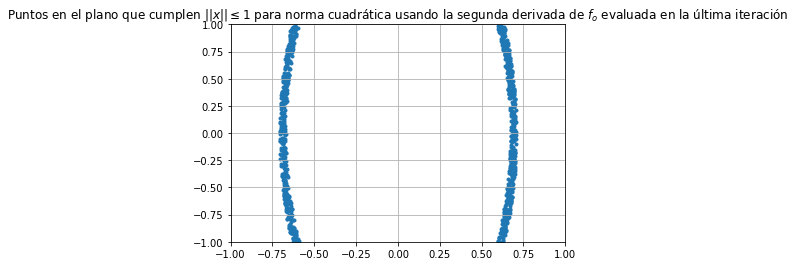

In [56]:
x_k = x_plot[:,-1].reshape(2,1)
Hf_x_k = Hessian_approximation(fo,x_k)
norm_cuad = lambda z : np.sum((z-x_k)*(Hf_x_k@(z-x_k)),axis=0)
density_p=int(2.5*10**4)
z_p=np.random.uniform(-1,1,(2,density_p))
lim_sup=.5
lim_inf=.45
ind=(norm_cuad(z_p)<=lim_sup) & (lim_inf<=norm_cuad(z_p))
z_p_subset = z_p[:,ind]
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.scatter(z_p_subset[0,:],z_p_subset[1,:],marker='.')
plt.title('Puntos en el plano que cumplen $||x|| \leq 1$ para norma cuadrática usando la segunda derivada de $f_o$ evaluada en la última iteración')
plt.grid()
plt.show()

In [57]:
np.linalg.cond(Hf_x_k)

10.000000000033086

**La matriz Hessiana es medianamente bien condicionada**

**Comentarios:**

* El número de condición de la matriz Hessiana de la función $f_o(x) = \frac{1}{2}\left ( x_1^2 + Cx_2^2 \right)$ es igual a $\max\left\{C, \frac{1}{C}\right\}$ lo cual se obtiene del cociente del eigenvalor máximo entre el eigenvalor mínimo de $\nabla ^2f(x)$: $\frac{\max\{1,C\}}{\min\{1,C\}}$ ya que $\nabla ^2 f_o(x)$ es una matriz diagonal y positiva definida pues $C>0$: $\nabla^2f(x)=\left [\begin{array}{cc}
1 & 0\\
0 & C\\
\end{array}
\right]
$ $\forall x \in \mathbb{R}^2$.

* Por el punto anterior el número de condición de la matriz Hessiana es grande si $C >> 1$ o $C <<1$. 

* El número de condición de la matriz Hessiana se observa que influye mucho en la convergencia del método de descenso en gradiente. Aún siendo la Hessiana medianamente bien condicionadas (número de condición igual a 10 con $C=10$ o $C=0.1$) el número de iteraciones cambió drásticamente (un número de iteraciones mayor a $50$). Esto se cumple para este método y el método más general: el método de descenso más pronunciado: ***steepest descent method***. Para matrices mal condicionadas el método de gradiente es muy lento por lo que no se recomienda en la práctica.

* La simplicidad del método de descenso en gradiente es su mayor ventaja pero su enorme dependencia en el número de condición en la Hessiana o los conjuntos subnivel es su desventaja.

**Ejercicio: realizar mismas gráficas y análisis de convergencia y curvas de nivel para la función objetivo $f_o(x) = \frac{1}{2}\left ( Cx_1^2 + x_2^2 \right)$ para $C=10^{-2}, 10^2$**.

## Método de descenso más pronunciado: *steepest descent method*

### Perspectiva general del método

Primero se busca una dirección $\Delta x_{\text{nsd}}$ que satisfaga: $$\Delta x_{\text{nsd}} = \text{argmin} \{ \nabla f(x)^Tv : ||v|| \leq 1, \nabla f(x)^Tv < 0 \} $$ donde: $|| \cdot||$ es alguna norma en $\mathbb{R}^n$. 

Posteriormente con $\Delta x_{\text{nsd}}$ se define el paso $\Delta x_{\text{sd}}=||\nabla f(x)||_* \Delta x_{\text{nsd}}$ donde: $|| \cdot||_*$ es la **norma dual**\*. 

\*La norma dual asociada a $||\cdot||$ se denota como $||\cdot||_*$ y se define como: $||z||_* = \sup \{z^Tx :||x||= 1\}$. Para los casos que veremos es suficiente saber que $||z||_{2*}$ (la norma dual de la norma $2$) es $||z||_2$ y $||z||_{1*}$ (la norma dual de la norma $1$) es $||z||_\infty$ $\forall z \in \mathbb{R}^n$.

**Comentarios:**

* $\Delta x_{\text{sd}}$ es dirección de descenso.

* Por la definición de $\Delta x_{\text{nsd}}$ anterior, se puede elegir alguna norma vectorial $||\cdot||$:

    * Si $||\cdot||$ es la norma $2$: $\Delta x_{\text{nsd}} = \text{argmin} \{ \nabla f(x)^Tv : ||v||_2 \leq 1, \nabla f(x)^Tv < 0 \} $ entonces $\Delta x_{\text{sd}} = - \nabla f(x)$. Con esto se prueba que el método de *steepest descent* generaliza al método de descenso en gradiente.

    * Si $||\cdot||$ es una norma cuadrática\* con matriz $P$: $\Delta x_{\text{nsd}} = \text{argmin} \{ \nabla f(x)^Tv : ||v||_P \leq 1, \nabla f(x)^Tv < 0 \} $  se prueba que $\Delta x_{\text{sd}} = - P^{-1} \nabla f(x)$.

    * Si $||\cdot||$ es la norma $1$: $\Delta x_{\text{nsd}} = \text{argmin} \{ \nabla f(x)^Tv : ||v||_1 \leq 1, \nabla f(x)^Tv < 0 \} $ se prueba que $\Delta x_{\text{sd}} = - \frac{\partial f(x)}{\partial x_i} e_i$ con $e_i$ $i$-ésimo vector canónico y el índice $i$ es la entrada del vector $\nabla f(x)$ de máxima magnitud: $i$ tal que $\left |(\nabla f(x))_i \right | = ||\nabla f(x)||_\infty$. En este caso el método se nombra **descenso por coordenadas** o ***coordinate descent***. En cada iteración **una única** componente de $x$ es actualizada.

\*La norma cuadrática de $z$ con matriz $P$ se define como $||z||_P = \sqrt{z^TPz}$ con $P$ matriz simétrica definida positiva



* **Interpretación:** $\Delta x_{\text{nsd}}$ es un paso tal que $||\Delta x_{\text{nsd}}|| = 1$ y da el **mayor decrecimiento en la aproximación lineal\* de $f$**. Geométricamente es la dirección en la bola unitaria (generada por $||\cdot||$) que se **extiende lo más lejos posible en la dirección $-\nabla f(x)$**.

\*Recuérdese que la aproximación lineal de $f$ está dada por Taylor a primer orden: $f(x+v)=\hat{f}(x+v) = f(x) + \nabla f(x)^Tv$.

* Para visualizar al paso $\Delta x_{\text{nsd}}$ se tiene el siguiente dibujo: 


**Con la norma cuadrática:**

<img src="https://dl.dropboxusercontent.com/s/91qivndznw2xfgb/steepest_descent_quadratic_norm.png?dl=0" heigth="700" width="700">



**Con la norma 1:**

<img src="https://dl.dropboxusercontent.com/s/hswkvfpu55otthz/steepest_descent_l1_norm.png?dl=0" heigth="700" width="700">


### Método de descenso más pronunciado bajo la norma cuadrática

En esta sección consideramos una norma cuadrática: $||z||_P = \sqrt{z^TPz}$ con $P$ matriz simétrica definida positiva para el método de descenso más pronunciado. Bajo esta norma se cumple: $\Delta x_{\text{sd}} = -P^{-1}\nabla f(x)$.

**Comentarios:** 

* Obsérvese que el método de descenso más pronunciado **generaliza** al método de descenso en gradiente con $P=I$ la matriz identidad.

* Es posible probar que el método de descenso más pronunciado bajo la norma cuadrática $||\cdot||_P$ es el método de descenso en gradiente aplicado al problema de optimización **después del cambio de coordenadas $\hat{x}=P^{1/2}x$**. En este cambio de coordenadas $x$ es la variable original por lo que si deseamos utilizar descenso en gradiente utilizamos la inversa de la matriz raíz cuadrada simétrica\* $P^{1/2}$ quedando la transformación como: $x = P^{-1/2}\hat{x}$.

\*$P^{1/2}$ se nombra **raíz cuadrada simétrica** o ***symmetric squareroot*** y está definida para matrices $P$ simétricas semidefinidas positivas como $P^{1/2}=Qdiag(\lambda_1^{1/2},\dots,\lambda_n^{1/2})Q^T$ con $Q$ y $diag(\lambda_1^{1/2},\dots,\lambda_n^{1/2})$ obtenidas de la descomposición espectral de $P$.

* El paso de Newton se obtiene considerando $P=\nabla ^2 f(x^*)$.

**Ejemplo:**

1) $$\min \quad e^{(x_1+3x_2-0.1)}+e^{x_1-3x_2-0.1}+e^{-x_1-0.1}$$

a)Usando $P_1=\left [\begin{array}{cc}
1 & 0\\
0 & 1\\
\end{array}
\right]
$ por lo que no hay transformación de coordenadas.

In [58]:
def coord_transform(x):
    eigenvalues, eigenvectors = np.linalg.eig(P)       
    return eigenvectors@((eigenvalues**(-1/2))*(np.transpose(eigenvectors)@x))

In [59]:
fo = lambda x: math.exp(x[0]+3*x[1]-0.1)+math.exp(x[0]-3*x[1]-0.1)+math.exp(-x[0]-0.1)

In [60]:
fo_transf = lambda x: fo(coord_transform(x))

In [61]:
P=np.eye(2)

In [62]:
x_ast = coord_transform(np.array([-3.4654e-01,-7.6725e-06],dtype=float))
x_0 = np.array([0,0],dtype=float)
tol=1e-8
tol_backtracking=1e-14
maxiter=50
p_ast=fo_transf(x_ast)

[x,total_of_iterations,Err_plot,x_plot]=gradient_descent(fo_transf, x_0,tol, tol_backtracking, x_ast, p_ast, maxiter)


I    Normagf   Error x_ast   Error p_ast   line search
0    9.05e-01    1.00e+00    1.55e-01     ---
1    2.71e-01    3.06e-01    1.43e-02     5.00e-01
2    7.64e-02    8.60e-02    1.14e-03     5.00e-01
3    2.14e-02    2.42e-02    8.93e-05     5.00e-01
4    5.98e-03    6.64e-03    6.98e-06     5.00e-01
5    1.68e-03    1.98e-03    5.46e-07     5.00e-01
6    1.07e-03    5.04e-04    8.08e-08     5.00e-01
7    5.28e-04    2.75e-04    2.57e-08     1.25e-01
8    2.85e-04    1.62e-04    8.84e-09     1.25e-01
9    3.57e-04    6.58e-05    4.68e-09     2.50e-01
10    1.62e-04    7.11e-05    2.17e-10     1.25e-01
11    7.64e-05    5.66e-05    1.33e-09     1.25e-01
12    3.85e-05    7.54e-05    1.63e-09     1.25e-01
13    2.12e-05    8.04e-05    1.72e-09     1.25e-01
14    2.54e-05    9.45e-05    1.75e-09     2.50e-01
15    1.16e-05    9.43e-05    1.77e-09     1.25e-01
16    5.53e-06    9.67e-05    1.78e-09     1.25e-01
17    2.86e-06    9.72e-05    1.78e-09     1.25e-01
18    1.56e-06    9.81e-

In [63]:
x

array([-3.46573595e-01, -5.55111512e-09])

In [64]:
total_of_iterations

29

In [65]:
Err_plot.shape

(29,)

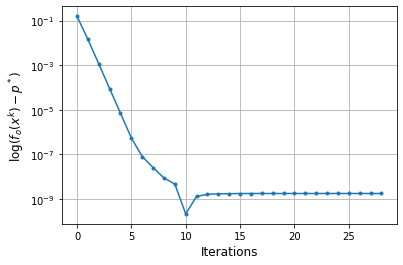

In [66]:
plt.yscale('log') #escala logarítmica en el eje vertical
plt.plot(np.arange(Err_plot.size),Err_plot,'.-')
plt.ylabel('$\log(f_o(x^k)-p^*)$',size=12)
plt.xlabel('Iterations',size=12)
plt.grid()
plt.show()

In [67]:
x_plot.shape

(2, 28)

In [68]:
x_plot[:,0]

array([-4.52418725e-01, -4.44089210e-08])

In [69]:
x_plot[:,-1]

array([-3.46573595e-01, -5.55111512e-09])

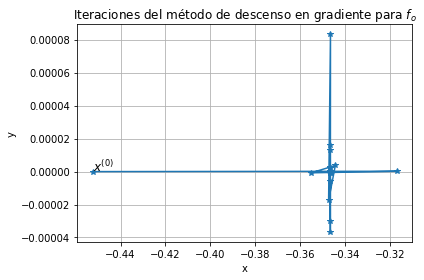

In [70]:
plt.plot(x_plot[0,:],x_plot[1,:],'-*')
plt.ylabel('y')
plt.xlabel('x')
plt.annotate('$x^{(0)}$',(x_plot[0,0],x_plot[1,0]),fontsize=12)
plt.title('Iteraciones del método de descenso en gradiente para $f_o$')
plt.grid()
plt.show()

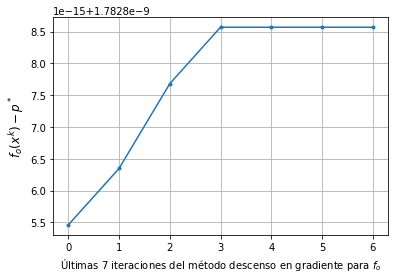

In [71]:
plt.plot(np.arange(Err_plot.size-22),Err_plot[22:],'.-')
plt.ylabel('$f_o(x^k)-p^*$',size=12)
plt.xlabel('Últimas 7 iteraciones del método descenso en gradiente para $f_o$')
plt.grid()
plt.show()

**Comentario:** en esta gráfica se observa una convergencia **lineal** del método de descenso en gradiente para $f_o$.

**Curvas de nivel de $f_o$**

In [72]:
z=lambda x_mesh,y_mesh: np.exp(x_mesh+3*y_mesh-0.1)+np.exp(x_mesh-3*y_mesh-0.1)+np.exp(-x_mesh-0.1)

In [73]:
def coord_transform_2(x):
    eigenvalues, eigenvectors = np.linalg.eig(P)      
    return eigenvectors@((eigenvalues**(-1/2)).reshape(x.shape[0],1)*(eigenvectors@x))

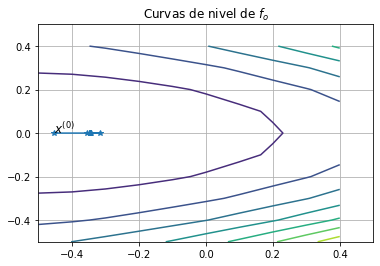

In [74]:
density=1e-1
xl=-.5
yl=-.5
xr=.5
yr=.5
x_p=np.arange(xl,xr,density)
y_p=np.arange(yl,yr,density)
x_y_p_t = coord_transform_2(np.row_stack((x_p,y_p)))
x_p_t = x_y_p_t[0,:]
y_p_t = x_y_p_t[1,:]
x_mesh,y_mesh = np.meshgrid(x_p_t,y_p_t)
plt.xlim(-.5, .5)
plt.ylim(-.5, .5)
plt.contour(x_p,y_p,z(x_mesh,y_mesh))
plt.plot(x_plot[0,:],x_plot[1,:],'-*')
plt.annotate('$x^{(0)}$',(x_plot[0,0],x_plot[1,0]),fontsize=12)
plt.grid()
plt.title("Curvas de nivel de $f_o$")
plt.show()

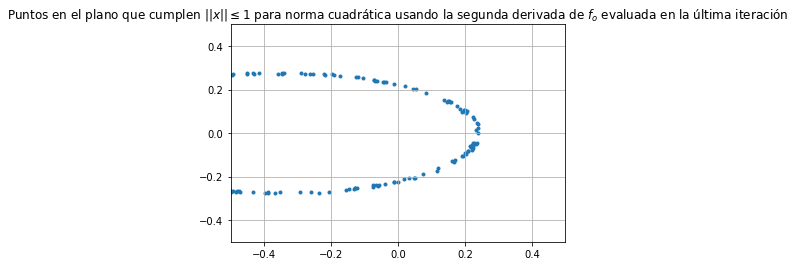

In [75]:
x_k = x_plot[:,-1]
Hf_x_k = Hessian_approximation(fo_transf,x_k)
x_k = x_k.reshape(2,1)
norm_cuad = lambda z : np.sum((z-x_k)*(Hf_x_k@(z-x_k)),axis=0)
density_p=int(2.5*10**4)
z_p=np.random.uniform(-1,1,(2,density_p))
lim_sup=.9
lim_inf=.85
ind=(norm_cuad(z_p)<=lim_sup) & (lim_inf<=norm_cuad(z_p))
z_p_subset = z_p[:,ind]
plt.xlim(-.5, .5)
plt.ylim(-.5, .5)
plt.scatter(z_p_subset[0,:],z_p_subset[1,:],marker='.')
plt.title('Puntos en el plano que cumplen $||x|| \leq 1$ para norma cuadrática usando la segunda derivada de $f_o$ evaluada en la última iteración')
plt.grid()
plt.show()

In [76]:
np.linalg.cond(Hf_x_k)

4.500694250729451

**La matriz Hessiana está bien condicionada**.

3) Usando $P_1=\left [\begin{array}{cc}
2 & 0\\
0 & 8\\
\end{array}
\right]
$ para transformar a $f_0$.

In [77]:
P=np.array([[2,0],
            [0,8]])

In [78]:
x_ast = coord_transform(np.array([-3.4654e-01,-7.6725e-06],dtype=float))


In [79]:
x_ast

array([-2.45040784e-01, -2.71263839e-06])

In [80]:
x_0 = np.array([0,0],dtype=float)
tol=1e-8
tol_backtracking=1e-14
maxiter=50
p_ast=fo_transf(x_ast)

[x,total_of_iterations,Err_plot,x_plot]=gradient_descent(fo_transf, x_0,tol, tol_backtracking, x_ast, p_ast, maxiter)


I    Normagf   Error x_ast   Error p_ast   line search
0    6.40e-01    1.00e+00    1.17e-01     ---
1    1.92e-01    1.61e+00    2.42e-02     1.00e+00
2    5.40e-02    8.28e-01    3.74e-02     1.00e+00
3    1.51e-02    1.05e+00    3.84e-02     1.00e+00
4    4.23e-03    9.87e-01    3.85e-02     1.00e+00
5    1.18e-03    1.00e+00    3.85e-02     1.00e+00
6    3.31e-04    9.99e-01    3.85e-02     1.00e+00
7    9.25e-05    1.00e+00    3.85e-02     1.00e+00
8    2.59e-05    1.00e+00    3.85e-02     1.00e+00
9    7.28e-06    1.00e+00    3.85e-02     1.00e+00
10    2.00e-06    1.00e+00    3.85e-02     1.00e+00
11    4.91e-07    1.00e+00    3.85e-02     1.00e+00
12    1.26e-07    1.00e+00    3.85e-02     1.00e+00
13    8.88e-08    1.00e+00    3.85e-02     1.00e+00
14    4.44e-08    1.00e+00    3.85e-02     5.00e-01
15    4.44e-08    1.00e+00    3.85e-02     3.91e-03
16    0.00e+00    1.00e+00    3.85e-02     3.12e-02
Error of x with respect to x_ast: 1.00e+00
Approximate solution: [-4.9012909

In [81]:
x

array([-4.90129093e-01, -1.56125113e-09])

In [82]:
total_of_iterations

17

In [83]:
Err_plot.shape

(17,)

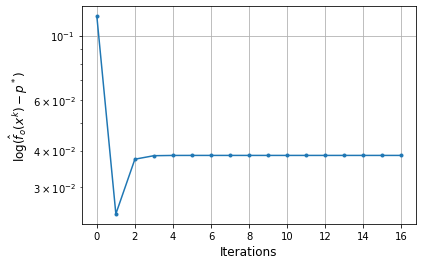

In [84]:
plt.yscale('log') #escala logarítmica en el eje vertical
plt.plot(np.arange(Err_plot.size),Err_plot,'.-')
plt.ylabel('$\log(\hat{f}_o(x^k)-p^*)$',size=12)
plt.xlabel('Iterations',size=12)
plt.grid()
plt.show()

In [85]:
x_plot.shape

(2, 16)

In [86]:
x_plot[:,0]

array([-0.63981664,  0.        ])

In [87]:
x_plot[:,-1]

array([-4.90129093e-01, -1.56125113e-09])

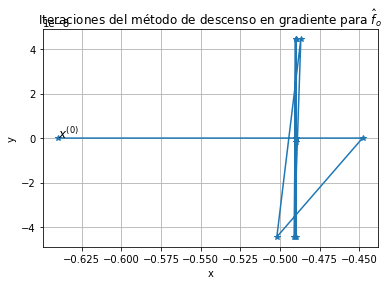

In [88]:
plt.plot(x_plot[0,:],x_plot[1,:],'-*')
plt.ylabel('y')
plt.xlabel('x')
plt.annotate('$x^{(0)}$',(x_plot[0,0],x_plot[1,0]),fontsize=12)
plt.title('Iteraciones del método de descenso en gradiente para $\hat{f}_o$')
plt.grid()
plt.show()

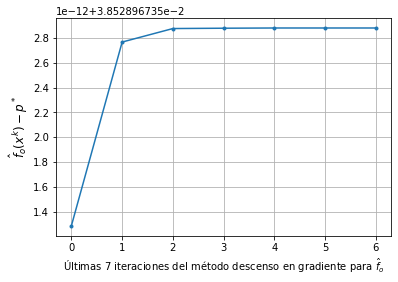

In [89]:
plt.plot(np.arange(Err_plot.size-10),Err_plot[10:],'.-')
plt.ylabel('$\hat{f}_o(x^k)-p^*$',size=12)
plt.xlabel('Últimas 7 iteraciones del método descenso en gradiente para $\hat{f}_o$')
plt.grid()
plt.show()

**Comentario:** en esta gráfica se observa una convergencia **lineal** del método de descenso en gradiente para $f_o$ transformada.

**Curvas de nivel de $f_o$ transformada**

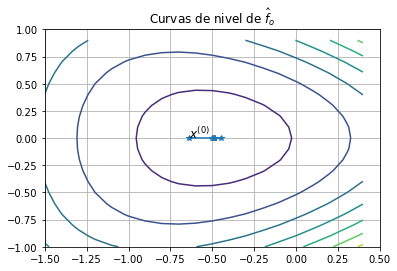

In [90]:
density=1e-1
xl=-1.5
yl=-1
xr=.5
yr=1
x_p=np.arange(xl,xr,density)
y_p=np.arange(yl,yr,density)
x_y_p_t = coord_transform_2(np.row_stack((x_p,y_p)))
x_p_t = x_y_p_t[0,:]
y_p_t = x_y_p_t[1,:]
x_mesh,y_mesh = np.meshgrid(x_p_t,y_p_t)
plt.xlim(-1.5, .5)
plt.ylim(-1, 1)
plt.contour(x_p,y_p,z(x_mesh,y_mesh))
plt.plot(x_plot[0,:],x_plot[1,:],'-*')
plt.annotate('$x^{(0)}$',(x_plot[0,0],x_plot[1,0]),fontsize=12)
plt.grid()
plt.title("Curvas de nivel de $\hat{f}_o$")
plt.show()

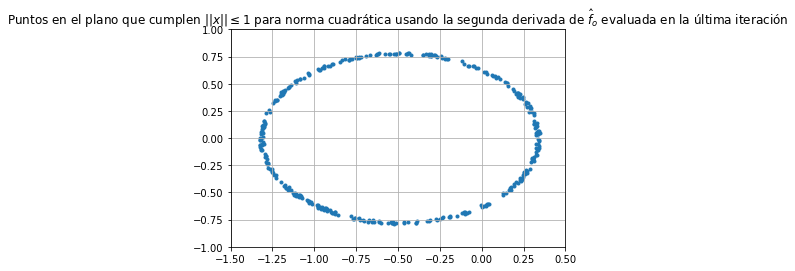

In [91]:
x_k = x_plot[:,-1]
Hf_x_k = Hessian_approximation(fo_transf,x_k)
x_k = x_k.reshape(2,1)
norm_cuad = lambda z : np.sum((z-x_k)*(Hf_x_k@(z-x_k)),axis=0)
density_p=int(2.5*10**4)
z_p=np.random.uniform(-2,1,(2,density_p))
lim_sup=.9
lim_inf=.85
ind=(norm_cuad(z_p)<=lim_sup) & (lim_inf<=norm_cuad(z_p))
z_p_subset = z_p[:,ind]
plt.xlim(-1.5, .5)
plt.ylim(-1, 1)
plt.scatter(z_p_subset[0,:],z_p_subset[1,:],marker='.')
plt.title('Puntos en el plano que cumplen $||x|| \leq 1$ para norma cuadrática usando la segunda derivada de $\hat{f}_o$ evaluada en la última iteración')
plt.grid()
plt.show()

In [92]:
np.linalg.cond(Hf_x_k)

1.124913254684247

**Obsérvese que es menor el número de condición con la transformación de $f_o$**.

c) Usando $P_2=\left [\begin{array}{cc}
8 & 0\\
0 & 2\\
\end{array}
\right]
$ para transformar a $f_o$.

In [93]:
P=np.array([[8,0],
            [0,2]])

In [94]:
x_ast = coord_transform(np.array([-3.4654e-01,-7.6725e-06],dtype=float))


In [95]:
x_ast

array([-1.22520392e-01, -5.42527678e-06])

In [96]:
x_0 = np.array([0,0],dtype=float)
tol=1e-8
tol_backtracking=1e-14
maxiter=60
p_ast=fo_transf(x_ast)

[x,total_of_iterations,Err_plot,x_plot]=gradient_descent(fo_transf, x_0,tol, tol_backtracking, x_ast, p_ast, maxiter)


I    Normagf   Error x_ast   Error p_ast   line search
0    3.20e-01    1.00e+00    3.67e-02     ---
1    2.13e-01    1.61e+00    4.85e-02     1.00e+00
2    1.44e-01    3.35e+00    8.65e-02     1.00e+00
3    9.73e-02    4.52e+00    1.04e-01     1.00e+00
4    6.60e-02    5.32e+00    1.12e-01     1.00e+00
5    4.49e-02    5.86e+00    1.15e-01     1.00e+00
6    3.05e-02    6.22e+00    1.17e-01     1.00e+00
7    2.08e-02    6.47e+00    1.18e-01     1.00e+00
8    1.48e-02    6.64e+00    1.18e-01     1.00e+00
9    2.41e-02    6.76e+00    1.18e-01     1.00e+00
10    1.34e-02    6.78e+00    1.18e-01     2.50e-01
11    9.31e-03    6.79e+00    1.18e-01     2.50e-01
12    2.25e-02    6.86e+00    1.18e-01     1.00e+00
13    1.10e-02    6.87e+00    1.19e-01     2.50e-01
14    6.41e-03    6.88e+00    1.19e-01     2.50e-01
15    9.18e-03    6.90e+00    1.19e-01     5.00e-01
16    5.17e-03    6.91e+00    1.19e-01     2.50e-01
17    7.62e-03    6.92e+00    1.19e-01     5.00e-01
18    4.17e-03    6.93e+

In [97]:
x

array([-9.80231973e-01,  2.89768209e-06])

In [98]:
total_of_iterations

60

In [99]:
Err_plot.shape

(60,)

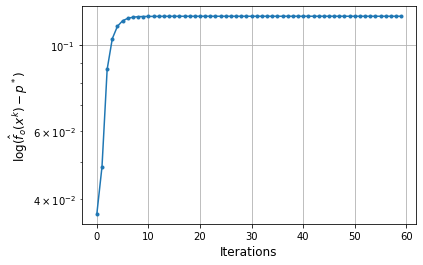

In [100]:
plt.yscale('log') #escala logarítmica en el eje vertical
plt.plot(np.arange(Err_plot.size),Err_plot,'.-')
plt.ylabel('$\log(\hat{f}_o(x^k)-p^*)$',size=12)
plt.xlabel('Iterations',size=12)
plt.grid()
plt.show()

In [101]:
x_plot.shape

(2, 59)

In [102]:
x_plot[:,0]

array([-0.31990832,  0.        ])

In [103]:
x_plot[:,-1]

array([-9.80231973e-01,  2.89768209e-06])

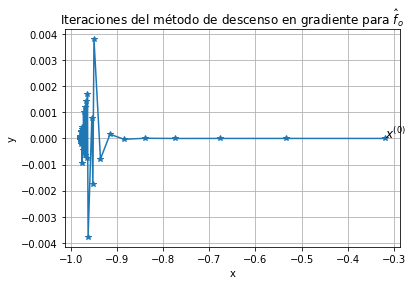

In [104]:
plt.plot(x_plot[0,:],x_plot[1,:],'-*')
plt.ylabel('y')
plt.xlabel('x')
plt.annotate('$x^{(0)}$',(x_plot[0,0],x_plot[1,0]),fontsize=12)
plt.title('Iteraciones del método de descenso en gradiente para $\hat{f}_o$')
plt.grid()
plt.show()

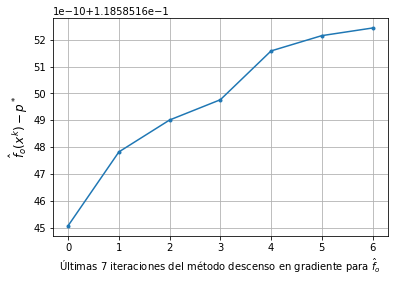

In [105]:
plt.plot(np.arange(Err_plot.size-53),Err_plot[53:],'.-')
plt.ylabel('$\hat{f}_o(x^k)-p^*$',size=12)
plt.xlabel('Últimas 7 iteraciones del método descenso en gradiente para $\hat{f}_o$')
plt.grid()
plt.show()

**Comentario:** en esta gráfica se observa una convergencia **lineal** del método de descenso en gradiente para $f_o$ transformada.

**Curvas de nivel de $f_o$ transformada**

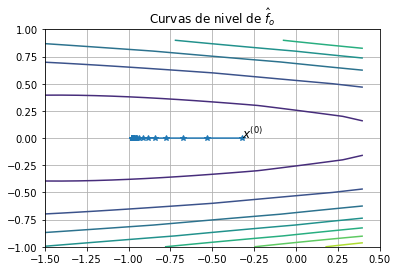

In [106]:
density=1e-1
xl=-1.5
yl=-1
xr=.5
yr=1
x_p=np.arange(xl,xr,density)
y_p=np.arange(yl,yr,density)
x_y_p_t = coord_transform_2(np.row_stack((x_p,y_p)))
x_p_t = x_y_p_t[0,:]
y_p_t = x_y_p_t[1,:]
x_mesh,y_mesh = np.meshgrid(x_p_t,y_p_t)
plt.xlim(-1.5, .5)
plt.ylim(-1, 1)
plt.contour(x_p,y_p,z(x_mesh,y_mesh))
plt.plot(x_plot[0,:],x_plot[1,:],'-*')
plt.annotate('$x^{(0)}$',(x_plot[0,0],x_plot[1,0]),fontsize=12)
plt.grid()
plt.title("Curvas de nivel de $\hat{f}_o$")
plt.show()

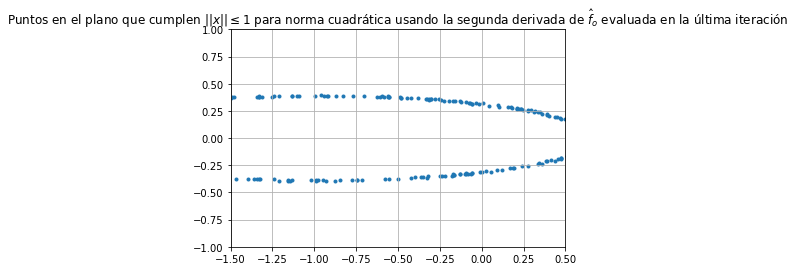

In [107]:
x_k = x_plot[:,-1]
Hf_x_k = Hessian_approximation(fo_transf,x_k)
x_k = x_k.reshape(2,1)
norm_cuad = lambda z : np.sum((z-x_k)*(Hf_x_k@(z-x_k)),axis=0)
density_p=int(2.5*10**4)
z_p=np.random.uniform(-2,1,(2,density_p))
lim_sup=.9
lim_inf=.85
ind=(norm_cuad(z_p)<=lim_sup) & (lim_inf<=norm_cuad(z_p))
z_p_subset = z_p[:,ind]
plt.xlim(-1.5, .5)
plt.ylim(-1, 1)
plt.scatter(z_p_subset[0,:],z_p_subset[1,:],marker='.')
plt.title('Puntos en el plano que cumplen $||x|| \leq 1$ para norma cuadrática usando la segunda derivada de $\hat{f}_o$ evaluada en la última iteración')
plt.grid()
plt.show()

In [108]:
np.linalg.cond(Hf_x_k)

18.011111111111113

**Obsérvese que es mayor el número de condición con la transformación de $f_o$**.

**Comentarios:**

* Como se observa en los ejemplos anteriores la elección de la norma en el método de descenso más pronunciado tiene un efecto fuerte en la tasa de convergencia. 

* Siempre existe una matriz $P$ para la cual el método de descenso más pronunciado tiene una convergencia buena. El reto está en encontrar tal matriz. La idea es identificar una matriz $P$ para la cual el problema transformado tenga un número de condición moderado.

## Método de Newton como un caso particular del método *steepest descent*

Consideramos con la norma cuadrática: $P=\nabla ^2 f(x^*)$ el método *steepest descent*:

In [156]:
x_ast=np.array([-3.4654e-01,-7.6725e-06])

In [157]:
P=Hessian_approximation(fo,x_ast)

In [158]:
P

array([[ 2.55884203e+00, -4.44089210e-04],
       [-4.44089210e-04,  1.15165655e+01]])

In [159]:
x_ast = coord_transform(x_ast)


In [160]:
x_ast

array([-2.16636502e-01, -7.93837398e-06])

In [162]:
x_0 = np.array([0,0],dtype=float)
tol=1e-8
tol_backtracking=1e-14
maxiter=50
p_ast=fo_transf(x_ast)

[x,total_of_iterations,Err_plot,x_plot]=gradient_descent(fo_transf, x_0,tol, tol_backtracking, x_ast, p_ast, maxiter)


I    Normagf   Error x_ast   Error p_ast   line search
0    5.66e-01    1.00e+00    9.80e-02     ---
1    1.13e-02    1.61e+00    5.72e-02     1.00e+00
2    2.03e-06    1.56e+00    5.73e-02     1.00e+00
3    8.88e-08    1.56e+00    5.73e-02     1.00e+00
4    0.00e+00    1.56e+00    5.73e-02     5.00e-01
Error of x with respect to x_ast: 1.56e+00
Approximate solution: [-5.54392310e-01  3.08197912e-05]


In [163]:
x

array([-5.54392310e-01,  3.08197912e-05])

In [164]:
total_of_iterations

5

In [145]:
Err_plot.shape

(5,)

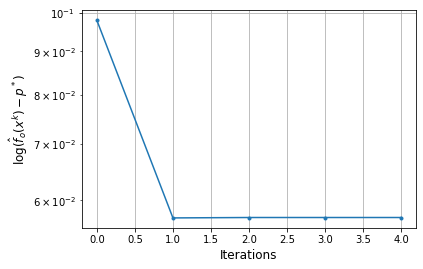

In [146]:
plt.yscale('log') #escala logarítmica en el eje vertical
plt.plot(np.arange(Err_plot.size),Err_plot,'.-')
plt.ylabel('$\log(\hat{f}_o(x^k)-p^*)$',size=12)
plt.xlabel('Iterations',size=12)
plt.grid()
plt.show()

In [147]:
x_plot.shape

(2, 4)

In [148]:
x_plot[:,0]

array([-5.65651348e-01, -1.48325796e-05])

In [149]:
x_plot[:,-1]

array([-5.54392310e-01,  3.08197912e-05])

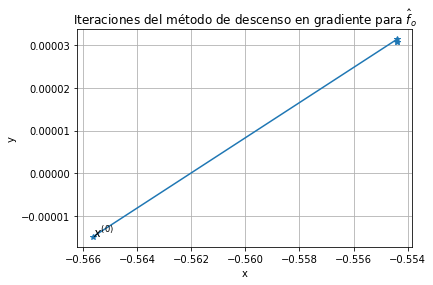

In [150]:
plt.plot(x_plot[0,:],x_plot[1,:],'-*')
plt.ylabel('y')
plt.xlabel('x')
plt.annotate('$x^{(0)}$',(x_plot[0,0],x_plot[1,0]),fontsize=12)
plt.title('Iteraciones del método de descenso en gradiente para $\hat{f}_o$')
plt.grid()
plt.show()

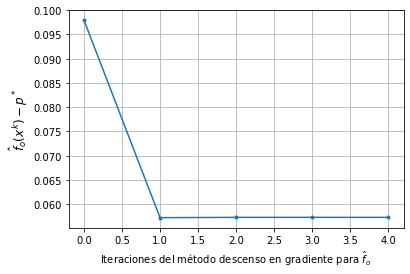

In [151]:
plt.plot(np.arange(Err_plot.size),Err_plot,'.-')
plt.ylabel('$\hat{f}_o(x^k)-p^*$',size=12)
plt.xlabel('Iteraciones del método descenso en gradiente para $\hat{f}_o$')
plt.grid()
plt.show()

**Comentario:** en esta gráfica se observa una convergencia **lineal** del método de descenso en gradiente para $f_o$ transformada.

**Curvas de nivel de $f_o$ transformada**

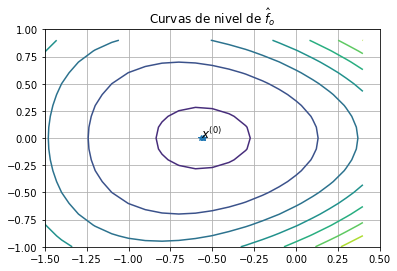

In [152]:
density=1e-1
xl=-1.5
yl=-1
xr=.5
yr=1
x_p=np.arange(xl,xr,density)
y_p=np.arange(yl,yr,density)
x_y_p_t = coord_transform_2(np.row_stack((x_p,y_p)))
x_p_t = x_y_p_t[0,:]
y_p_t = x_y_p_t[1,:]
x_mesh,y_mesh = np.meshgrid(x_p_t,y_p_t)
plt.xlim(-1.5, .5)
plt.ylim(-1, 1)
plt.contour(x_p,y_p,z(x_mesh,y_mesh))
plt.plot(x_plot[0,:],x_plot[1,:],'-*')
plt.annotate('$x^{(0)}$',(x_plot[0,0],x_plot[1,0]),fontsize=12)
plt.grid()
plt.title("Curvas de nivel de $\hat{f}_o$")
plt.show()

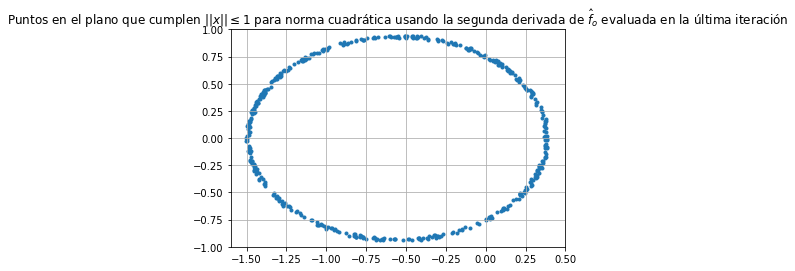

In [154]:
x_k = x_plot[:,-1]
Hf_x_k = Hessian_approximation(fo_transf,x_k)
x_k = x_k.reshape(2,1)
norm_cuad = lambda z : np.sum((z-x_k)*(Hf_x_k@(z-x_k)),axis=0)
density_p=int(2.5*10**4)
z_p=np.random.uniform(-2,1,(2,density_p))
lim_sup=.9
lim_inf=.85
ind=(norm_cuad(z_p)<=lim_sup) & (lim_inf<=norm_cuad(z_p))
z_p_subset = z_p[:,ind]
plt.xlim(-1.6, .5)
plt.ylim(-1, 1)
plt.scatter(z_p_subset[0,:],z_p_subset[1,:],marker='.')
plt.title('Puntos en el plano que cumplen $||x|| \leq 1$ para norma cuadrática usando la segunda derivada de $\hat{f}_o$ evaluada en la última iteración')
plt.grid()
plt.show()

In [155]:
np.linalg.cond(Hf_x_k)

1.0008884940026654

**Obsérvese que la Hessiana con la transformación de $f_o$ está muy bien condicionada**.

Otra forma de aplicar el método de Newton.

Falta definir el decremento de Newton

In [109]:
def Newtons_method(f, x_0, tol, 
                   tol_backtracking, x_ast=None, p_ast=None, maxiter=30):
    '''
    Method of gradient descent to numerically approximate solution of min f.
    Args:
        f (lambda expression): definition of function f.
        x_0 (array): initial point for gradient descent method.
        tol (float): tolerance that will halt method. Controls norm of gradient of f.
        tol_backtracking (float): tolerance that will halt method. Controls value of line search by backtracking.
        x_ast (array): solution of min f, now it's required that user knows the solution...
        p_ast (float): value of f(x_ast), now it's required that user knows the solution...
        maxiter (int): maximum number of iterations
    Returns:
        x (array): numpy array, approximation of x_ast.
        iteration (int): number of iterations.
        Err_plot (array): numpy array of absolute error between p_ast and f(x) with x approximation.
                          of x_ast. Useful for plotting.
        x_plot (array): numpy array that containts in columns vector of approximations. Last column
                        contains x, approximation of solution. Useful for plotting.
    '''
    iteration = 0
        
    x = x_0
    
    feval = f(x)
    gfeval = gradient_approximation(f,x)

    normgf = np.linalg.norm(gfeval)
    
    Err_plot_aux = np.zeros(maxiter)
    Err_plot_aux[iteration]=math.fabs(feval-p_ast)
    
    Err = compute_error(x_ast,x)
    n = x.size
    x_plot = np.zeros((n,maxiter))
    x_plot[:,iteration] = x
    
    print('I    Normagf   Error x_ast   Error p_ast   line search')
    print('{}    {:0.2e}    {:0.2e}    {:0.2e}     {}'.format(iteration,normgf,Err,Err_plot_aux[iteration],"---"))
    iteration+=1
    while(normgf>tol and iteration < maxiter):
        dir_desc = -gfeval
        der_direct = gfeval.dot(dir_desc)
        t = line_search_by_backtracking(f,dir_desc,x,der_direct)
        x = x + t*np.linalg.solve(P,dir_desc)
        feval = f(x)
        gfeval = gradient_approximation(f,x)
        normgf = np.linalg.norm(gfeval)
        Err_plot_aux[iteration] = math.fabs(feval-p_ast);
        x_plot[:,iteration] = x
        Err = compute_error(x_ast,x)
        print('{}    {:0.2e}    {:0.2e}    {:0.2e}     {:0.2e}'.format(iteration,normgf,Err,
                                                                      Err_plot_aux[iteration],t))
        if t<tol_backtracking: #if t is less than tol_backtracking then we need to check the reason
            iter_salida=iteration
            iteration = maxiter
        iteration+=1
    print('{} {:0.2e}'.format("Error of x with respect to x_ast:",Err))
    print('{} {}'.format("Approximate solution:", x))
    cond = Err_plot_aux > np.finfo(float).eps*10**(-2)
    Err_plot = Err_plot_aux[cond]
    #x_plot = x_plot[:,~np.all(x_plot == 0,axis=0)]
    x_plot = x_plot[:,:iteration]
    if iteration == maxiter and t < tol_backtracking:
        print("Backtracking value less than tol_backtracking, check approximation")
        iteration=iter_salida
    return [x,iteration,Err_plot,x_plot]

**Referencias:**

* S. P. Boyd, L. Vandenberghe, Convex Optimization, Cambridge University Press, 2009.
